#### **ANALISIS MODAL ESPECTRAL**


In [701]:
import pandas as pd
import numpy as np
from scipy.linalg import eigh
import matplotlib.pyplot as plt


def read_xlsx(file_name: str) -> np.array:
    df = pd.read_excel(file_name, header=None)
    K = df.to_numpy()
    return K


# Leer las matrices K y M desde los archivos Excel
K = read_xlsx("K.xlsx")
M = read_xlsx("M.xlsx")

# Calcular autovalores y autovectores
autovalores, autovectores = eigh(K, M)

# Crear DataFrames para los autovalores y autovectores
df_autovalores = pd.DataFrame(autovalores, columns=['Autovalores'])
df_autovectores = pd.DataFrame(autovectores)

# Mostrar los DataFrames
print("DataFrame de Autovalores:")
print(df_autovalores)

print("\nDataFrame de Autovectores:")
print(df_autovectores)

DataFrame de Autovalores:
    Autovalores
0    246.640737
1    297.788707
2    664.656274
3   5781.294333
4   5881.860260
5  12917.915199
6  12971.766591
7  16497.535570
8  36462.278877

DataFrame de Autovectores:
          0         1         2         3         4         5         6  \
0  0.000000  2.285890  0.000000  0.000000 -1.060679  0.679828  0.000000   
1  0.000000  1.249110  0.000000  0.000000  1.724667 -1.509221  0.000000   
2  0.000000  0.164103  0.000000  0.000000  1.647114  2.018065  0.000000   
3  2.295894  0.000000  0.000000 -1.047539  0.000000  0.000000  0.666356   
4  1.232058  0.000000  0.000000  1.749799  0.000000  0.000000 -1.494235   
5  0.152976  0.000000  0.000000  1.628916  0.000000  0.000000  2.033650   
6  0.000000  0.000000  0.005100  0.000000  0.000000  0.000000  0.000000   
7  0.000000  0.000000  0.002720  0.000000  0.000000  0.000000  0.000000   
8  0.000000  0.000000  0.000306  0.000000  0.000000  0.000000  0.000000   

          7         8  
0  0.000000

In [702]:
def read_xlsx(file_name: str) -> np.array:
    df = pd.read_excel(file_name, header=None)
    K = df.to_numpy()
    return K


# Leer las matrices K y M desde los archivos Excel
K = read_xlsx("K.xlsx")
M = read_xlsx("M.xlsx")

# Calcular autovalores y autovectores
autovalores, autovectores = eigh(K, M)

# Normalización de los autovectores al piso 1
for i in range(autovectores.shape[1]):
    # Buscar el primer valor diferente de cero en el autovector
    for j in autovectores[:, i]:
        if j != 0:
            normalizador = j
            break
    # Normalizar todo el autovector
    autovectores[:, i] = autovectores[:, i] / normalizador

# Convertir a DataFrame para visualizar
df_autovectores_normalizados = pd.DataFrame(autovectores).round(2)
print("Autovectores normalizados al piso 1:")
print(df_autovectores_normalizados)

Autovectores normalizados al piso 1:
      0     1     2     3     4     5     6     7     8
0  0.00  1.00  0.00 -0.00  1.00  1.00  0.00 -0.00  0.00
1  0.00  0.55  0.00 -0.00 -1.63 -2.22  0.00 -0.00  0.00
2  0.00  0.07  0.00 -0.00 -1.55  2.97  0.00 -0.00  0.00
3  1.00  0.00  0.00  1.00 -0.00  0.00  1.00 -0.00  0.00
4  0.54  0.00  0.00 -1.67 -0.00  0.00 -2.24 -0.00  0.00
5  0.07  0.00  0.00 -1.55 -0.00  0.00  3.05 -0.00  0.00
6  0.00  0.00  1.00 -0.00 -0.00  0.00  0.00  1.00  1.00
7  0.00  0.00  0.53 -0.00 -0.00  0.00  0.00 -1.70 -2.22
8  0.00  0.00  0.06 -0.00 -0.00  0.00  0.00 -1.56  3.06


In [703]:
# frecuencias naturales
frecuencias_naturales = np.sqrt(autovalores)
frecuencias_naturales

array([ 15.7047998 ,  17.25655548,  25.78092849,  76.03482316,
        76.69328693, 113.65700682, 113.89366352, 128.44273265,
       190.95098554])

In [704]:
# periodos de vibración
periodos_vibracion = 2 * np.pi / frecuencias_naturales
periodos_vibracion

array([0.40008057, 0.36410426, 0.24371447, 0.08263563, 0.08192614,
       0.05528199, 0.05516712, 0.04891818, 0.0329047 ])

In [705]:
import numpy as np

# Suponiendo que 'autovectores' y 'M' ya están definidos

# Inicialización de la variable para almacenar el factor de participación
Li = np.zeros(autovectores.shape[1])
influencia = [0, 0, 0, 1, 1, 1, 0, 0, 0]
# Cálculo del factor de participación Li para cada autovector
for i in range(autovectores.shape[1]):
    # Cálculo del factor de participación Li
    Li[i] = (autovectores[:, i].T @ M @ influencia)

# Li contiene el factor de participación para cada autovector
print("Factor de participación Li:")
print(Li)

Factor de participación Li:
[ 0.23534178  0.          0.         -0.32666158  0.          0.
  0.26561459  0.          0.        ]


In [706]:
# Mi=Φ'.M.Φ  (masa generalizada)
Mi = np.zeros(autovectores.shape[1])
for i in range(autovectores.shape[1]):
    Mi[i] = np.dot(autovectores[:, i], np.dot(M, autovectores[:, i]))
Mi

array([1.89712623e-01, 1.91376782e-01, 3.84426544e+04, 9.11295833e-01,
       8.88857742e-01, 2.16372318e+00, 2.25209523e+00, 1.88748217e+05,
       4.55941642e+05])

In [707]:
# Li^2/Mi (factor masa participacion)
Li_masa = Li ** 2 / Mi
Li_masa

array([0.29194553, 0.        , 0.        , 0.11709457, 0.        ,
       0.        , 0.03132688, 0.        , 0.        ])

In [708]:
# Li_masa es el array que contiene los factores de participación de masa (Li)

porcentaje_masa_participativa = Li_masa / np.sum(Li_masa)

porcentaje_masa_participativa

array([0.66295964, 0.        , 0.        , 0.26590224, 0.        ,
       0.        , 0.07113812, 0.        , 0.        ])

In [709]:
import numpy as np


def calcular_espectro_E030_PERU(Tn, Z, S, R, U, Tp, Tl):
    """
    Calcula el espectro de diseño para una lista de periodos de vibración.

    Parameters:
    - Tn: Lista de periodos de vibración.
    - Z: Zona sísmica.
    - S: Factor de tipo de suelo.
    - R: Coeficiente de reducción de fuerzas sísmicas.
    - U: Factor de uso.
    - Tp: Periodo de corte.
    - Tl: Periodo límite.

    Returns:
    - Lista de espectros de diseño.
    """
    # Cálculo del espectro base
    espectro_base = (Z * U * S) / R

    # Calcular espectro para cada periodo de vibración
    espectro = []
    for tn in Tn:
        if tn < Tp:
            C = 2.5
        elif Tp <= tn <= Tl:
            C = 2.5 * (Tp / tn)
        else:  # tn > Tl
            C = 2.5 * ((Tp * Tl) / tn**2)

        espectro_value = espectro_base * C * 981
        espectro.append(espectro_value)

    return np.array(espectro)


# Valores proporcionados
Z = 0.25
S = 1.2
R = 8
U = 1
Tp = 0.6
Tl = 2


# Calcular el espectro
espectroSa = calcular_espectro_E030_PERU(
    periodos_vibracion, Z, S, R, U, Tp, Tl)

espectroSa
# # Mostrar resultados
# print("Espectro de diseño para los periodos de vibración:")
# for tn, value in zip(Tn, espectro):
#     print(f"Periodo: {tn} s, Espectro: {value:.2f}")

array([91.96875, 91.96875, 91.96875, 91.96875, 91.96875, 91.96875,
       91.96875, 91.96875, 91.96875])

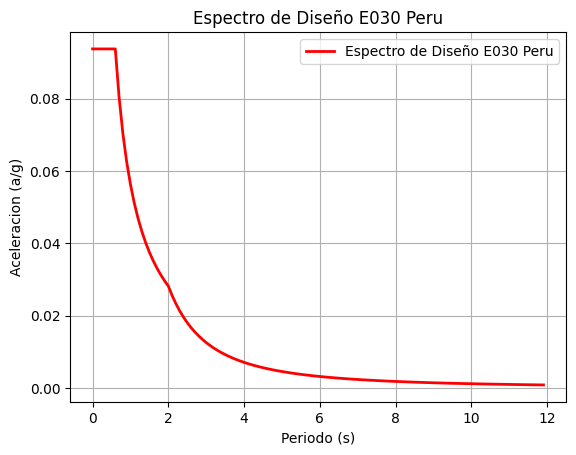

In [710]:
Periodos_plot = np.arange(0, 12, 0.1)
espectros = calcular_espectro_E030_PERU(Periodos_plot, Z, S, R, U, Tp, Tl)/981

plt.plot(Periodos_plot, espectros, linestyle='-', linewidth=2, color='r',
         label='Espectro de Diseño E030 Peru')
plt.xlabel('Periodo (s)')
plt.ylabel('Aceleracion (a/g)')
plt.title('Espectro de Diseño E030 Peru')
plt.grid(True)
plt.legend()
plt.show()
# espectros

In [711]:
# espectro de diseño de desplazamiento
espectroSd = espectroSa / (2 * np.pi / periodos_vibracion)**2
espectroSd

array([0.37288548, 0.30883894, 0.13837039, 0.01590799, 0.015636  ,
       0.00711947, 0.00708992, 0.0055747 , 0.0025223 ])

#### **deformaciones**


In [712]:
# # Calcular deformaciones
# deforaciones = []
# for i in range(autovectores.shape[1]):
#     deforacion = autovectores[:, i] * Li[i] * espectroSd[i] / Mi[i]
#     deforaciones.append(deforacion)
# deforaciones = np.array(deforaciones).T
# # Convertir deformaciones a DataFrame
# df_deforaciones = pd.DataFrame(deforaciones).round(2)

# # Calcular la suma absoluta de todos los elementos de cada fila
# suma_absoluta_filas = df_deforaciones.abs().sum(axis=1)

# # Agregar la columna de suma absoluta al DataFrame
# df_deforaciones['Suma Absoluta'] = suma_absoluta_filas

# # Mostrar el DataFrame actualizado
# print("DataFrame de Deformaciones con Suma Absoluta de Filas:")
# print(df_deforaciones)

In [713]:
import numpy as np
import pandas as pd

# Calcular deformaciones
deformaciones = []
for i in range(autovectores.shape[1]):
    deformacion = autovectores[:, i] * Li[i] * espectroSd[i] / Mi[i]
    deformaciones.append(deformacion)
deformaciones = np.array(deformaciones).T

# Convertir deformaciones a DataFrame
df_deformaciones = pd.DataFrame(deformaciones).round(2)

# Calcular la suma absoluta de todos los elementos de cada fila
suma_absoluta_filas = df_deformaciones.abs().sum(axis=1)

# Calcular SRSS (Suma de Raíces Cuadradas)
SRSS = np.sqrt((df_deformaciones ** 2).sum(axis=1))

# Calcular CQC (Combinación Cuadrática Completa)


def CQC(df):
    n_modes = df.shape[1]
    cqc = []
    for i in range(df.shape[0]):
        suma = 0
        for j in range(n_modes):
            for k in range(n_modes):
                suma += df.iloc[i, j] * df.iloc[i, k] * (1 if j == k else 0.5)
        cqc.append(np.sqrt(suma))
    return np.array(cqc)


CQC_values = CQC(df_deformaciones)

# Agregar las columnas de combinaciones y suma absoluta al DataFrame
df_deformaciones['Suma Absoluta'] = suma_absoluta_filas.round(2)
df_deformaciones['SRSS'] = SRSS.round(2)
df_deformaciones['CQC'] = CQC_values.round(2)

# Mostrar el DataFrame actualizado
print("DataFrame de Deformaciones con Suma Absoluta, SRSS y CQC:")
print(df_deformaciones)

DataFrame de Deformaciones con Suma Absoluta, SRSS y CQC:
      0    1    2     3    4    5    6    7    8  Suma Absoluta  SRSS   CQC
0  0.00  0.0  0.0  0.00  0.0  0.0  0.0 -0.0  0.0           0.00  0.00  0.00
1  0.00  0.0  0.0  0.00 -0.0 -0.0  0.0 -0.0  0.0           0.00  0.00  0.00
2  0.00  0.0  0.0  0.00 -0.0  0.0  0.0 -0.0  0.0           0.00  0.00  0.00
3  0.46  0.0  0.0 -0.01 -0.0  0.0  0.0 -0.0  0.0           0.47  0.46  0.46
4  0.25  0.0  0.0  0.01 -0.0  0.0 -0.0 -0.0  0.0           0.26  0.25  0.26
5  0.03  0.0  0.0  0.01 -0.0  0.0  0.0 -0.0  0.0           0.04  0.03  0.04
6  0.00  0.0  0.0  0.00 -0.0  0.0  0.0  0.0  0.0           0.00  0.00  0.00
7  0.00  0.0  0.0  0.00 -0.0  0.0  0.0 -0.0 -0.0           0.00  0.00  0.00
8  0.00  0.0  0.0  0.00 -0.0  0.0  0.0 -0.0  0.0           0.00  0.00  0.00


#### **Calcular fuerzas de entrepiso**


In [714]:
# # Calcular fuerzas de entrepiso FI = (M.Φ[i]).Li[i]*Sa[i]/Mi[i]
# fuerzas_entrepiso = []
# for i in range(autovectores.shape[1]):
#     fuerza_entrepiso = np.dot(
#         M, autovectores[:, i]) * Li[i] * espectroSa[i] / Mi[i]
#     fuerzas_entrepiso.append(fuerza_entrepiso)
# fuerzas_entrepiso = np.array(fuerzas_entrepiso).T
# # Convertir fuerzas cortantes a DataFrame
# df_fuerzas_cortantes = pd.DataFrame(fuerzas_entrepiso).round(2)

# # Calcular la suma absoluta de todos los elementos de cada fila
# suma_absoluta_filas = df_fuerzas_cortantes.abs().sum(axis=1)

# # Agregar la columna de suma absoluta al DataFrame
# df_fuerzas_cortantes['Suma Absoluta'] = suma_absoluta_filas

# # Mostrar el DataFrame actualizado
# print("DataFrame de Fuerzas de entrepiso con Suma Absoluta de Filas:")
# print(df_fuerzas_cortantes)

In [715]:
import numpy as np
import pandas as pd

# Calcular fuerzas de entrepiso FI = (M.Φ[i]).Li[i]*Sa[i]/Mi[i]
fuerzas_entrepiso = []
for i in range(autovectores.shape[1]):
    fuerza_entrepiso = np.dot(
        M, autovectores[:, i]) * Li[i] * espectroSa[i] / Mi[i]
    fuerzas_entrepiso.append(fuerza_entrepiso)
fuerzas_entrepiso = np.array(fuerzas_entrepiso).T

# Convertir fuerzas cortantes a DataFrame
df_fuerzas_cortantes = pd.DataFrame(fuerzas_entrepiso).round(2)

# Calcular la suma absoluta de todos los elementos de cada fila
suma_absoluta_filas = df_fuerzas_cortantes.abs().sum(axis=1)

# Calcular SRSS (Suma de Raíces Cuadradas)
SRSS = np.sqrt((df_fuerzas_cortantes ** 2).sum(axis=1))

# Calcular CQC (Combinación Cuadrática Completa)


def CQC(df):
    n_modes = df.shape[1]
    cqc = []
    for i in range(df.shape[0]):
        suma = 0
        for j in range(n_modes):
            for k in range(n_modes):
                suma += df.iloc[i, j] * df.iloc[i, k] * (1 if j == k else 0.5)
        cqc.append(np.sqrt(suma))
    return np.array(cqc)


CQC_values = CQC(df_fuerzas_cortantes)

# Agregar las columnas de combinaciones y suma absoluta al DataFrame
df_fuerzas_cortantes['Suma Absoluta'] = suma_absoluta_filas.round(2)
df_fuerzas_cortantes['SRSS'] = SRSS.round(2)
df_fuerzas_cortantes['CQC'] = CQC_values.round(2)

# Mostrar el DataFrame actualizado
print("DataFrame de Fuerzas de entrepiso con Suma Absoluta, SRSS y CQC:")
print(df_fuerzas_cortantes)

DataFrame de Fuerzas de entrepiso con Suma Absoluta, SRSS y CQC:
       0    1    2     3    4    5     6    7    8  Suma Absoluta   SRSS  \
0   0.00  0.0  0.0 -0.00  0.0  0.0  0.00  0.0  0.0           0.00   0.00   
1   0.00  0.0  0.0 -0.00 -0.0 -0.0  0.00  0.0  0.0           0.00   0.00   
2   0.00  0.0  0.0 -0.00 -0.0  0.0  0.00  0.0  0.0           0.00   0.00   
3  16.75  0.0  0.0 -4.84  0.0  0.0  1.59  0.0  0.0          23.18  17.51   
4   8.99  0.0  0.0  8.08  0.0  0.0 -3.57  0.0  0.0          20.64  12.60   
5   1.12  0.0  0.0  7.52  0.0  0.0  4.86  0.0  0.0          13.50   9.02   
6   0.00  0.0  0.0 -0.00  0.0  0.0  0.00  0.0  0.0           0.00   0.00   
7   0.00  0.0  0.0 -0.00  0.0  0.0  0.00 -0.0 -0.0           0.00   0.00   
8   0.00  0.0  0.0 -0.00  0.0  0.0  0.00 -0.0  0.0           0.00   0.00   

     CQC  
0   0.00  
1   0.00  
2   0.00  
3  15.63  
4  13.06  
5  11.48  
6   0.00  
7   0.00  
8   0.00  


#### **Fuerzas cortantes de entrepiso**


In [716]:
import numpy as np
import pandas as pd


def calcular_fuerzas_cortantes_entrepiso(fuerzas_entrepiso):
    # Convertir la lista de listas a una matriz de numpy
    matriz = np.array(fuerzas_entrepiso)

    # Obtener el número de filas y columnas
    filas, columnas = matriz.shape

    # Crear una matriz de ceros del mismo tamaño para el resultado
    fuerzas_cortantes_entrepiso = np.zeros((filas, columnas))

    # Iterar sobre cada columna
    for col in range(columnas):
        suma_acumulativa = 0
        for row in range(filas-1, -1, -1):
            if matriz[row, col] != 0:
                suma_acumulativa += matriz[row, col]
                fuerzas_cortantes_entrepiso[row, col] = suma_acumulativa

    return fuerzas_cortantes_entrepiso


# Calcular fuerzas cortantes de entrepiso
fuerzas_cortantes_entrepiso = calcular_fuerzas_cortantes_entrepiso(
    fuerzas_entrepiso)

# Convertir fuerzas cortantes a DataFrame
df_fuerzas_cortantes_entrepiso = pd.DataFrame(
    fuerzas_cortantes_entrepiso).round(2)

# Calcular la suma absoluta de todos los elementos de cada fila
suma_absoluta_filas = df_fuerzas_cortantes_entrepiso.abs().sum(axis=1)

# Calcular SRSS (Suma de Raíces Cuadradas)
SRSS = np.sqrt((df_fuerzas_cortantes_entrepiso ** 2).sum(axis=1))

# Calcular CQC (Combinación Cuadrática Completa)


def CQC(df):
    n_modes = df.shape[1]
    cqc = []
    for i in range(df.shape[0]):
        suma = 0
        for j in range(n_modes):
            for k in range(n_modes):
                suma += df.iloc[i, j] * df.iloc[i, k] * (1 if j == k else 0.5)
        cqc.append(np.sqrt(suma))
    return np.array(cqc)


CQC_values = CQC(df_fuerzas_cortantes_entrepiso)

# Agregar las columnas de combinaciones y suma absoluta al DataFrame
df_fuerzas_cortantes_entrepiso['Suma Absoluta'] = suma_absoluta_filas.round(2)
df_fuerzas_cortantes_entrepiso['SRSS'] = SRSS.round(2)
df_fuerzas_cortantes_entrepiso['CQC'] = CQC_values.round(2)

# Mostrar el DataFrame actualizado
print("DataFrame de Fuerzas Cortantes de Entrepiso con Suma Absoluta, SRSS y CQC:")
print(df_fuerzas_cortantes_entrepiso)

DataFrame de Fuerzas Cortantes de Entrepiso con Suma Absoluta, SRSS y CQC:
       0    1    2      3    4    5     6    7    8  Suma Absoluta   SRSS  \
0   0.00  0.0  0.0   0.00  0.0  0.0  0.00  0.0  0.0            0.0   0.00   
1   0.00  0.0  0.0   0.00  0.0  0.0  0.00  0.0  0.0            0.0   0.00   
2   0.00  0.0  0.0   0.00  0.0  0.0  0.00  0.0  0.0            0.0   0.00   
3  26.85  0.0  0.0  10.77  0.0  0.0  2.88  0.0  0.0           40.5  29.07   
4  10.10  0.0  0.0  15.61  0.0  0.0  1.29  0.0  0.0           27.0  18.64   
5   1.12  0.0  0.0   7.52  0.0  0.0  4.86  0.0  0.0           13.5   9.02   
6   0.00  0.0  0.0   0.00  0.0  0.0  0.00  0.0  0.0            0.0   0.00   
7   0.00  0.0  0.0   0.00  0.0  0.0  0.00  0.0  0.0            0.0   0.00   
8   0.00  0.0  0.0   0.00  0.0  0.0  0.00  0.0  0.0            0.0   0.00   

     CQC  
0   0.00  
1   0.00  
2   0.00  
3  35.25  
4  23.20  
5  11.48  
6   0.00  
7   0.00  
8   0.00  
